In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

import sys
sys.path.insert(0, '../util/')
from util import util

In [2]:
datapath = '/home/jw1624/H1-merian/csvs/breathingModes/'

## Set params

In [51]:
rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
   

In [62]:
matplotlib.rc('font', family='serif')
rcParams['axes.linewidth'] = 2
rcParams['xtick.major.width'] = 2
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['ytick.major.size'] = 10

rcParams['font.family'] = 'serif'

rcParams['savefig.bbox'] = 'tight'
rcParams['savefig.transparent'] = False

## Looking at r431 first

In [69]:
df = pd.read_csv(datapath+'r431_qtys.txt')
df.head()

,galaxyID,timestep,t,dt,z,M_star,R_halflight,R_halfmass,sigma_gas,sigma_star,SFR_10,SFR_100,sSFR_10,sSFR_100
0,431,4096,13.800820,0.400820,0.000000,1.486476e+09,4.186630,2.85,7.981416,45.101895,2.702323e+06,2.377159e+07,0.001818,0.015992
1,431,4032,13.400000,0.500000,0.030000,7.279541e+03,0.401532,-1.00,8.095398,17.884760,7.279541e+03,7.279541e+03,1.000000,1.000000
2,431,3936,12.900000,0.400000,0.060000,7.013348e+03,0.000128,-1.00,2.801852,17.053071,7.013348e+03,7.013348e+03,1.000000,1.000000
3,431,3648,12.500000,0.348085,0.090000,6.260617e+03,0.184130,-1.00,8.385788,19.995410,6.260617e+03,6.260617e+03,1.000000,1.000000
4,431,3606,12.151915,0.441915,0.124892,1.223316e+09,3.731433,2.45,6.932679,47.055990,2.360590e+06,1.882841e+07,0.001930,0.015391


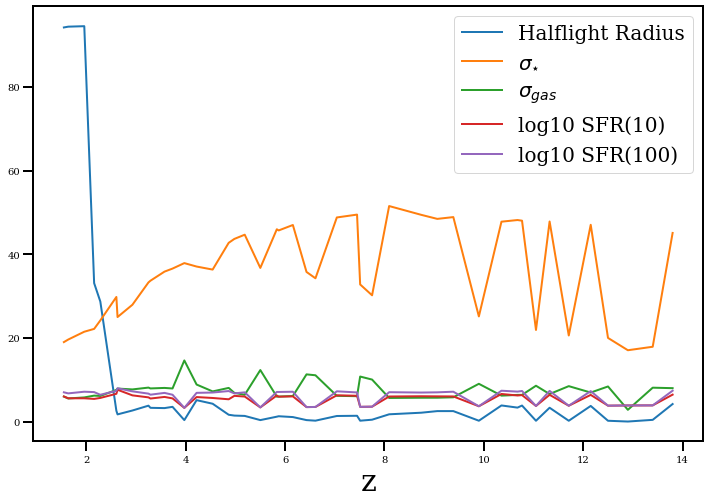

In [72]:
fig = plt.figure(facecolor='w', figsize=(12,8))

plt.plot(df['t'], df['R_halflight'], linewidth=2)
plt.plot(df['t'], df['sigma_star'], linewidth=2)
plt.plot(df['t'], df['sigma_gas'], linewidth=2)
plt.plot(df['t'], np.log10(df['SFR_10']), linewidth=2)
plt.plot(df['t'], np.log10(df['SFR_100']), linewidth=2)

#plt.xlim([1.0,0])

plt.legend(['Halflight Radius', r'$\sigma_{\star}$', r'$\sigma_{gas}$', 'log10 SFR(10)', 
            'log10 SFR(100)'], fontsize=20)

plt.xlabel('z', fontsize=30)

plt.savefig('figures/breathing/prelim.png')

## 

## Three Panel Figure
R_hm, sSFR and sigma as functions of time

In [55]:
cdmgals = util.getGalaxies()[0]

In [56]:
data.head()

,galaxyID,timestep,t,dt,z,M_star,R_halflight,R_halfmass,sigma_gas,sigma_star,SFR_10,SFR_100,sSFR_10,sSFR_100
0,431,4096,13.800820,0.400820,0.000000,1.486476e+09,4.186630,2.85,7.981416,45.101895,2.702323e+06,2.377159e+07,0.001818,0.015992
1,431,4032,13.400000,0.500000,0.030000,7.279541e+03,0.401532,-1.00,8.095398,17.884760,7.279541e+03,7.279541e+03,1.000000,1.000000
2,431,3936,12.900000,0.400000,0.060000,7.013348e+03,0.000128,-1.00,2.801852,17.053071,7.013348e+03,7.013348e+03,1.000000,1.000000
3,431,3648,12.500000,0.348085,0.090000,6.260617e+03,0.184130,-1.00,8.385788,19.995410,6.260617e+03,6.260617e+03,1.000000,1.000000
4,431,3606,12.151915,0.441915,0.124892,1.223316e+09,3.731433,2.45,6.932679,47.055990,2.360590e+06,1.882841e+07,0.001930,0.015391


(0.0, 70.0)

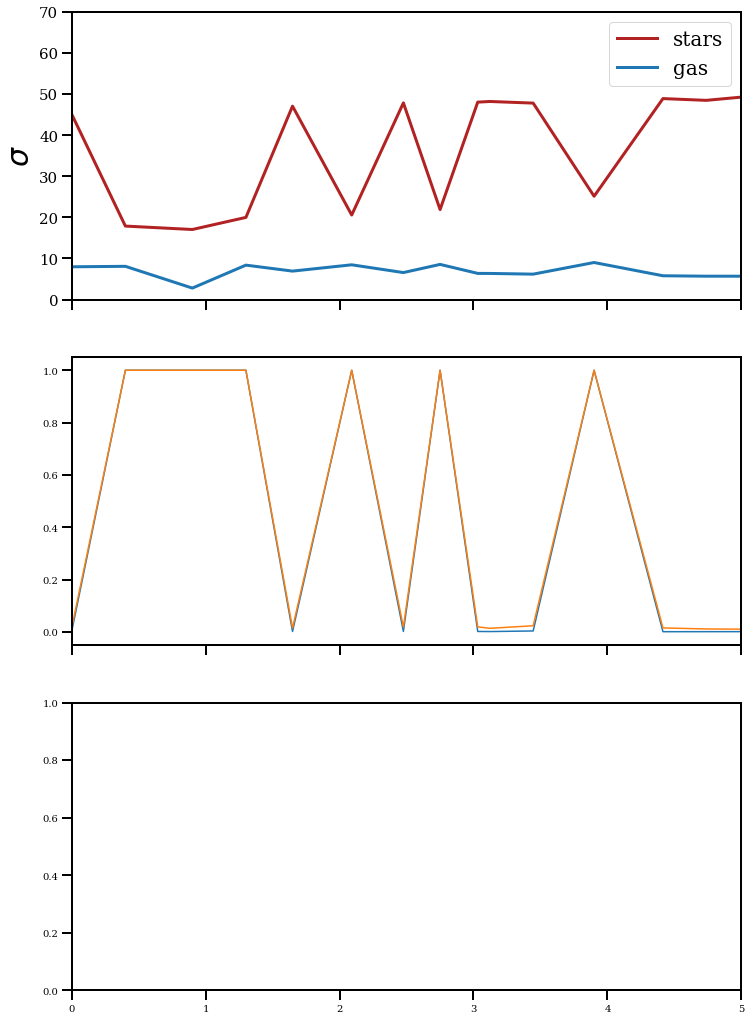

In [74]:
gal = cdmgals[0]
data = pd.read_csv(datapath+'r'+str(gal)+'_qtys.txt')

fig, axs = plt.subplots(3,1, facecolor='w', figsize=(12,18), sharex=True)
tlim = 5

# get lookback time 
tlookback = abs(data['t'] - max(data['t']))

# top panel: sigma
axs[0].plot(tlookback, data['sigma_star'], linewidth=3, color='firebrick')
axs[0].plot(tlookback, data['sigma_gas'], linewidth=3, color='tab:blue')

# middle panel: sSFR
axs[1].plot(tlookback, data['sSFR_10'])
axs[1].plot(tlookback, data['sSFR_100'])

# prettify 
axs[0].set_xlim([0,tlim])
axs[1].set_xlim([0,tlim])
axs[2].set_xlim([0,tlim])

axs[0].tick_params(axis='both', which='major', labelsize=15)
    
axs[0].set_ylabel(r'$\sigma$', fontsize=30)

axs[0].legend(['stars', 'gas'], fontsize=20)
axs[0].set_ylim([0,70])
